# Análise exploratória de dados

In [1]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Descrição dos dados

In [ ]:
<picture>
  <img src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png" 
       alt="Os Pinguins da pesquisa palmerpenguins" 
       width="600" 
       style="display: block; margin: auto;">
</picture>


## Quantidade de instâncias
O conjunto de dados contém informações sobre 344 pinguins, pertencentes a três espécies diferentes, que foram observados em três ilhas distintas no Arquipélago Palmer, localizado na Antártida. As três espécies de pinguins presentes são Adelie, Chinstrap e Gentoo, sendo que as observações foram feitas em três ilhas: Torgersen, Biscoe e Dream.

## Variáveis
1. especies: Representa a espécie do pinguim. Tipo qualitativo nominal.
2. ilha: Indica a ilha onde o pinguim foi observado. Tipo qualitativo nominal.
3. comprimento_do_bico_mm: Comprimento do bico do pinguim em milímetros. Tipo quantitativo contínuo.
4. profundidade_do_bico_mm: Profundidade do bico do pinguim em milímetros. Tipo quantitativo contínuo.
5. comprimento_do_nadadeira_mm: Comprimento da nadadeira do pinguim em milímetros. Tipo quantitativo contínuo.
6. massa_corporal_g: Massa corporal do pinguim em gramas. Tipo quantitativo contínuo.
7. sexo: Indica o sexo do pinguim (Masculino ou Feminino). Tipo qualitativo nominal.

In [7]:
# Caminho dataset
df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/penguins.csv')

## Leitura do conjunto de dados 
df = pd.read_csv("../data/raw/data.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
## Dicionário de Dados
dictionary = '../data/external/dictionary.csv'
dt_dict = pd.read_csv(dictionary)

# Exibe dicionário
dt_dict

,variavel,descricao,tipo,subtipo
0,species,"Espécie do pinguim (Adelie, Chinstrap, Gentoo)",qualitativa,nominal
1,bill_length_mm,Comprimento do bico em milímetros,quantitativa,contínua
2,bill_depth_mm,Profundidade do bico em milímetros,quantitativa,contínua
3,island,"Ilha onde o pinguim foi encontrado (Biscoe, Dr...",qualitativa,nominal
4,flipper_length_mm,Comprimento da nadadeira em milímetros,quantitativa,contínua
5,body_mass_g,Massa corporal em gramas,quantitativa,contínua
6,sex,Sexo do pinguim (Masculino ou Feminino),qualitativa,nominal
7,year,Ano em que os dados foram coletados,quantitativa,discreta


In [9]:
## Tratamento de Valores Faltantes
# Verificar a quantidade de valores faltantes por coluna
print(df.isnull().sum())

# Excluir linhas com valores faltantes
df_cleaned = df.dropna()

# Alternativamente, imputar valores para variáveis numéricas (exemplo: substituindo com a média)
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)

# Verificar se os valores faltantes foram tratados
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


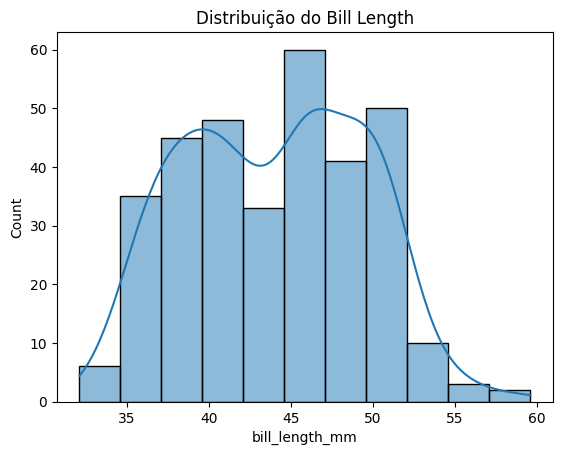

In [24]:
## Distribuição das variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['bill_length_mm'], kde=True)
plt.title('Distribuição do Bill Length')
plt.show()


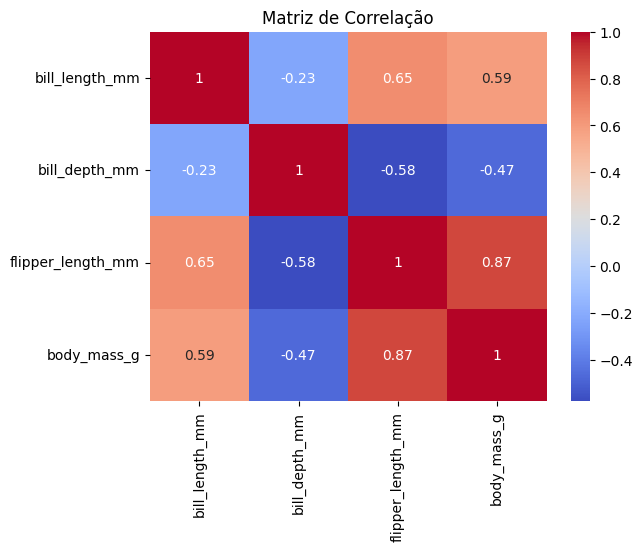

In [25]:
## Visualizar a correlação entre variáveis numéricas
corr = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

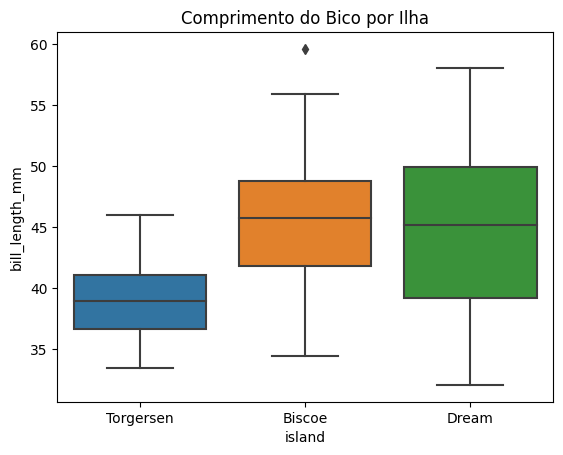

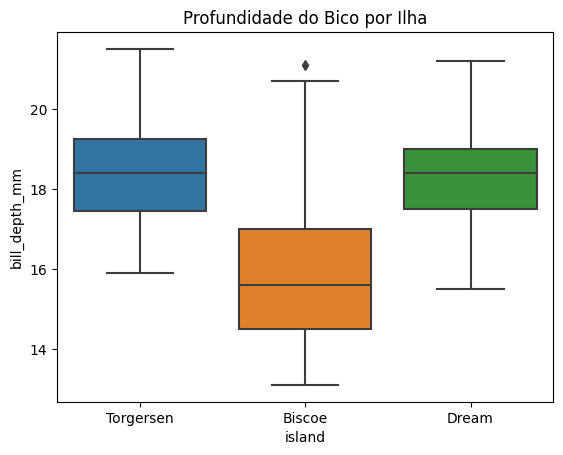

In [42]:
## Boxplot de Comprimento e Profundidade do Bico por Ilha
# Boxplot para comparação do comprimento do bico entre as ilhas
sns.boxplot(x='island', y='bill_length_mm', data=df_cleaned)
plt.title('Comprimento do Bico por Ilha')
plt.show()

# Boxplot para comparação da profundidade do bico entre as ilhas
sns.boxplot(x='island', y='bill_depth_mm', data=df_cleaned)
plt.title('Profundidade do Bico por Ilha')
plt.show()



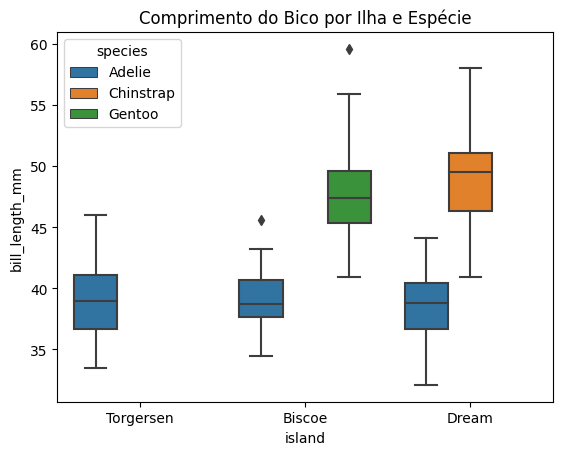

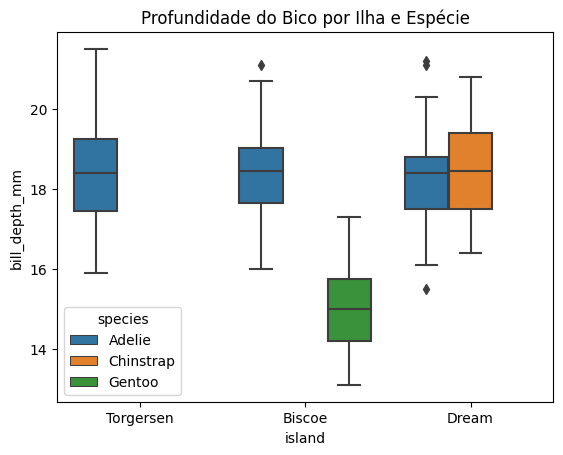

In [43]:
## Comparação entre ilhas e Espécies
# Boxplot para comparar a combinação de ilha e espécie
sns.boxplot(x='island', y='bill_length_mm', hue='species', data=df_cleaned)
plt.title('Comprimento do Bico por Ilha e Espécie')
plt.show()

sns.boxplot(x='island', y='bill_depth_mm', hue='species', data=df_cleaned)
plt.title('Profundidade do Bico por Ilha e Espécie')
plt.show()


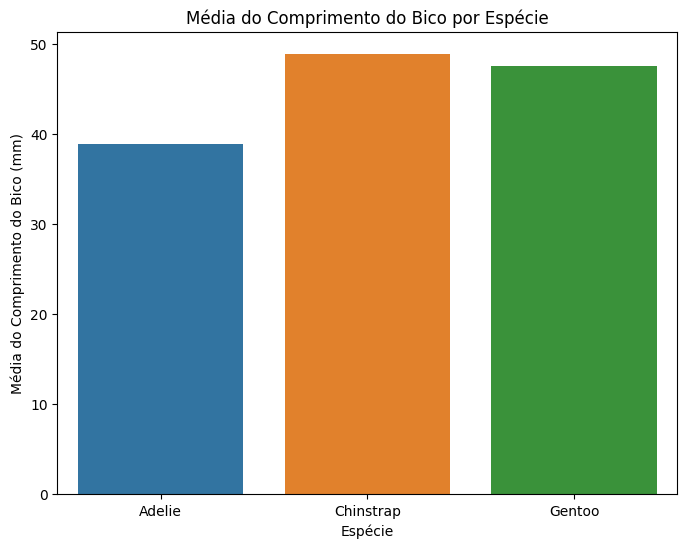

In [38]:
## Média do Comprimento do Bico (em mm) por Espécies
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a média do comprimento do bico por espécie
media_bico_por_especie = df_cleaned.groupby('species')['bill_length_mm'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='bill_length_mm', data=media_bico_por_especie)

# Adicionar título e rótulos
plt.title('Média do Comprimento do Bico por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Média do Comprimento do Bico (mm)')

# Exibir o gráfico
plt.show()


## 2. Perguntas de partida e hipóteses

## 3. Insights